Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introduction to Vibration Theory


### Class 11 - Free vibration of multi degree of freedom systems

[1.   Natural vibration modes and frequency](#section_1)  
[1.1. The general solution for free vibration](#section_11)  
[1.2. Natural vibration modes and frequencies](#section_12)  
[1.3. Orthogonality of vibration modes](#section_13)  
[2.   Examples of modal properties assessment](#section_2)  
[2.1. Example 1: steel plane truss](#section_21)  
[2.2. Example 2: beam element](#section_22)  
[2.3. Example 3: experimental 3-dof model](#section_23)  
[3.   Structural response to initial conditions](#section_3)  
[4.   The Rayleigh viscous damping matrix](#section_4)  
[5.   Assignment](#section_5)  

---
_Prof. Marcelo M. Rocha, Dr.techn._ [(ORCID)](https://orcid.org/0000-0001-5640-1020)  
_Porto Alegre, RS, Brazil_ 


In [1]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import matplotlib.pyplot as plt
import pickle as pk
import scipy.linalg as sc

# Load matrices generated in Class 10 (that notebook must be run firstly!)

with open('data/sample_KM.pk', 'rb') as KM:
    K1, M1, K2, M2, K3, M3 = pk.load(KM)


## 1. Natural vibration modes and frequencies <a name="section_1"></a> 

### 1.1. The general solution for free vibration <a name="section_11"></a> 

Once the stiffness and mass matrices are defined for a given structure, the
undamped equilibrium matrix equation results to be a set of coupled equilibrium
equations, each one for one of the degrees of freedom. In matrix forms it reads:

$$ \mathbf{M} \, \ddot{\vec{u}} + \mathbf{K} \, \vec{u} = \vec{F}(t) $$ 

where $\vec{F}(t)$ is the (time dependent) external loads vector.
In case of free vibration we have:

$$ \mathbf{M} \, \ddot{\vec{u}} + \mathbf{K} \, \vec{u} = \vec{0} $$ 

Let us now assume that there is a solution $\vec{u}(t)$ such that:

$$ \vec{u}(t) = u_k(t) \, \vec{\varphi}_k $$

where $\vec{\varphi}_k$ is not time dependent. This assumption may be
understood as a separation of time and space dependence of $\vec{u}(t)$.
Now the acceleration vector results to be:

$$ \ddot{\vec{u}}(t) = \ddot{u}_k(t)  \, \vec{\varphi}_k $$

and the free vibration equation becomes:

$$ \ddot{u}_k(t) \, \mathbf{M} \, \vec{\varphi}_k  + 
          u_k(t) \, \mathbf{K} \, \vec{\varphi}_k  = \vec{0} $$ 

Premultiplying this equation by $\mathbf{K}^{-1}$ and dividing by $u_k(t)$ results:

$$ \frac{\ddot{u}_k(t)}{u_k(t)} \, \mathbf{D} \, \vec{\varphi}_k  + 
         \vec{\varphi}_k  = \vec{0} $$ 

where $\mathbf{D} = \mathbf{K}^{-1} \, \mathbf{M}$ is called the
_system dynamic matrix_.
Recalling that $\vec{\varphi}_k$ is not time dependent implies that the equation
above is only valid if the coefficient of matrix $\mathbf{D}$ is constant in time.
We denote this constant quotient as $-\omega_k^2$ and the condition becomes:

$$ \ddot{u}_k(t) + \omega_k^2 u_k(t) = 0 $$

The solution for this equation has the general form:

$$ u_k(t) = u_{k0} \sin \left( \omega_k t + \theta_k \right) $$

which is the same form found for a single degree of freedom system.
However, the time function $u_k(t)$ is only part of the solution for $\vec{u}(t)$,
corresponding to its time dependent amplitude. 
There is still the need of finding the time independent vector, $\vec{\varphi}_k$,
and the free vibration frequency, $\omega_k$.


### 1.2. Natural vibration modes and frequencies <a name="section_12"></a> 

The general amplitude solution above implies that the acceleration vector is:

$$ \ddot{\vec{u}}(t) = -\omega_k^2 u_{k0} 
   \sin \left( \omega_k t + \theta_k \right) \, \vec{\varphi}_k $$

Replacing this result in the free vibration equation and simplifying gives:

$$ \mathbf{K} \, \vec{\varphi}_k = \omega_k^2 \, \mathbf{M} \, \vec{\varphi}_k  $$ 

or, alternativelly, with the dynamic matrix:

$$ \mathbf{D} \, \vec{\varphi}_k = \lambda_k \, \vec{\varphi}_k  $$ 

with $\lambda_k = 1\,/\,\omega_k^2$.
The two equations above represent an eigenvalue-eigenvector problem, which
has as many solutions as the matrices order, which is also the number
of system degrees of freedom. 
Each solution is a pair $\left( \omega_k, \vec{\varphi}_k \right)$ or, 
alternatively, $\left( \lambda_k, \vec{\varphi}_k \right)$ if the 
dynamic matrix is used.

The eigenvalues $\omega_k$ are called the _natural vibration frequencies_
of the strutural system, while the eigenvectors $\vec{\varphi}_k$ are
called the _vibration modes_, or _modal shapes_. 
It is very important to keep in mind that _the modal shapes have 
no prespecified scale_, what means that they can be multiplied by
any scale factor, $\alpha$, and still remain solutions for the eigenproblem:

$$ \mathbf{K} \, (\alpha \vec{\varphi}_k) = 
   \omega_k^2 \, \mathbf{M} \, (\alpha \vec{\varphi}_k) $$ 

Numerical algorithms for solving this eigenproblem are available in many
environments, including the best models of HP handheld calculators. 
In Python, they are available in ```scipy.linalg``` module and will be
used in [section 2](#section_2) for the three examples provided in the previous class.


### 1.3. Orthogonality of vibration modes <a name="section_13"></a> 

The eigenvectors $\vec{\varphi}_k$ presents the important property of _orthogonality_
with respect to the stiffness and to the mass matrix.
This is a direct consequence of their symmetry, as shown in the following.
Let us start by considering two vibration modes $i$ and $j$ that are solutions for
the eigenproblem:

\begin{align*}
\mathbf{M} \, \vec{\varphi}_i &= \lambda_i \mathbf{K} \, \vec{\varphi}_i \\
\mathbf{M} \, \vec{\varphi}_j &= \lambda_j \mathbf{K} \, \vec{\varphi}_j
\end{align*}

Transposing the equation for mode $i$ above and recognizing that 
$\mathbf{M} = \mathbf{M}^{\intercal}$ and $\mathbf{K} = \mathbf{K}^{\intercal}$ gives:

$$ \vec{\varphi}_i^{\intercal} \, \mathbf{M} 
 = \lambda_i \vec{\varphi}_i^{\intercal} \, \mathbf{K} $$

Now, postmultiplying by $\vec{\varphi}_j$ gives:

$$ \vec{\varphi}_i^{\intercal} \, \mathbf{M} \, \vec{\varphi}_j
 = \lambda_i \vec{\varphi}_i^{\intercal} \, \mathbf{K} \, \vec{\varphi}_j $$

On the other hand, the eigenproblem for mode $j$ above can be premultiplied by 
$\vec{\varphi}_i$ to give:

$$ \vec{\varphi}_i^{\intercal} \, \mathbf{M} \, \vec{\varphi}_j
 = \lambda_j \vec{\varphi}_i^{\intercal} \, \mathbf{K} \, \vec{\varphi}_j $$

Subtracting this last equation from the previous one results in:

$$ (\lambda_i - \lambda_j) \, \vec{\varphi}_i^{\intercal} \, \mathbf{K} \, \vec{\varphi}_j = 0 $$

This condition can be satisfied if and only if:

$$ \vec{\varphi}_i^{\intercal} \, \mathbf{K} \, \vec{\varphi}_j = 0,
   \hspace{1cm} {\rm for} \; i \neq j $$

Starting again this demonstration with the $j$ eigenproblem solution leads also to:

$$ \vec{\varphi}_i^{\intercal} \, \mathbf{M} \, \vec{\varphi}_j = 0,
   \hspace{1cm} {\rm for} \;  i \neq j $$

These are the two orthogonality conditions for the eigenvectors $\vec{\varphi}_k$.
In the next class they will be used to decouple the matrix equilibrium equation 
into a set of scalar equations, one for each vibration mode.


## 2. Examples of modal properties assessment <a name="section_2"></a> 

### 2.1. Example 1: steel plane truss  <a name="section_21"></a> 

The eigenvalues and eigenvectors are solved with ```scipy``` function ```eig``` 
from module ```linalg```.
For the steel truss presented last class this is done as follows: 


In [2]:
# Uses scipy to solve the standard eigenvalue problem
w21, Phi1 = sc.eig(K1, M1)

# Ensure ascending order of eigenvalues
iw   = w21.argsort()
w21  = w21[iw]
Phi1 = Phi1[:,iw]

# Eigenvalues to vibration frequencies
wk1  = np.sqrt(np.real(w21)) 
fk1  = wk1/2/np.pi


The script below shows the results as nodal displacements at the truss top.


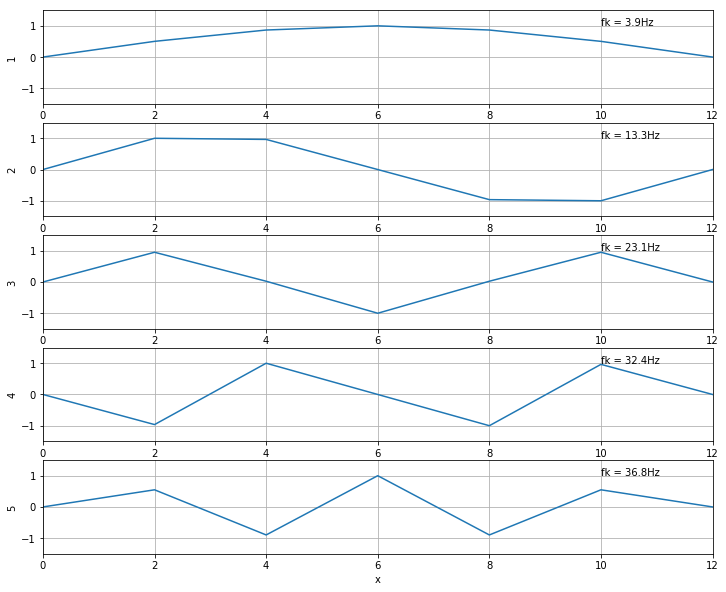

In [3]:
plt.figure(1, figsize=(12,10))
x = np.arange(0, 14, 2)

for k in range(5):
    pk = np.zeros(7)
    pk[1:-1] = Phi1[:,k]
    pk /= np.max(np.abs(pk))   # adjust scale for unity amplitude
    
    plt.subplot(5,1,k+1)
    plt.plot(x, pk)
    
    plt.xlim( 0.0, 12.0);
    plt.ylim(-1.5,  1.5);  plt.ylabel(str(k+1));
    plt.text(10, 1, 'fk = {0:3.1f}Hz'.format(fk1[k]));
    plt.grid(True)

plt.xlabel('x');


### 2.2. Example 2: beam element <a name="section_22"></a> 



The interpolation functions could not be dumped with ```pickle```, so we must re-create
them for visualizing the modal shapes:


In [4]:
# Beam length discretization
L   = 1

# Defining a list of lambda functions
phi = []
phi.append(lambda xi:  1 - 3*xi*xi + 2*xi*xi*xi)
phi.append(lambda xi:  L*(xi - 2*xi*xi + xi*xi*xi))
phi.append(lambda xi:  3*xi*xi - 2*xi*xi*xi)
phi.append(lambda xi:  L*(-xi*xi + xi*xi*xi ))


Furthermore, the stiffness matrix is not positive definite, for no 
boundary conditions have been applied so far (it is a bar "floating in space").
It is necessary to restrain at least two degrees of freedom to suppress a 
free body motion.
For instance, to model a cantilever beam we can restrain $u_1 = 0$ and $u_2 = 0$,
what implies that the first two rows and two columns of $\mathbf{K}$ and 
$\mathbf{M}$ can be removed:


In [5]:
K2 = K2[2:,2:]
M2 = M2[2:,2:]


Now the eigenvalues problem can be solved:

In [6]:
# Uses scipy to solve the standard eigenvalue problem
w22, Phi2 = sc.eig(K2, M2)

# Ensure ascending order of eigenvalues
iw   = w22.argsort()
w22  = w22[iw]
Phi2 = Phi2[:,iw]

# Eigenvalues to vibration frequencies
wk2  = np.sqrt(np.real(w22)) 
fk2  = wk2/2/np.pi


For the visualization below, the vibration modes are a linear combination of the 
interpolation functions (for the remaining degrees of freedom), each one multiplied 
by the resulting eingenvector coordinate.


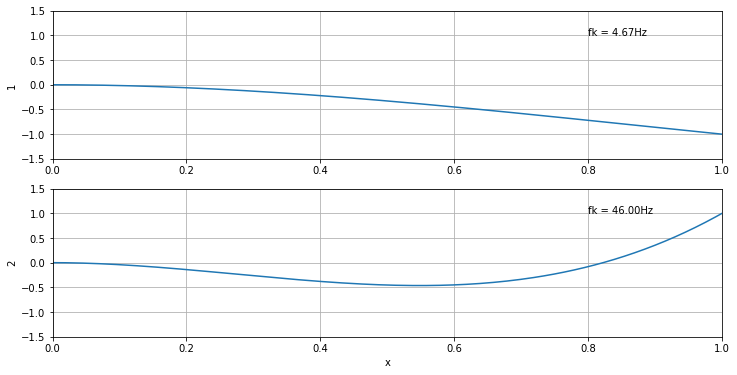

In [7]:
plt.figure(2, figsize=(12,6))
x  = np.linspace(0, 1, 200)

for k in range(2):
    pk = Phi2[:,k]
    px = np.zeros(x.shape)
    
    for km in range(2):
        px += pk[km]*phi[km+2](x)   # superpose interpolations
    
    px /= np.max(np.abs(px))        # adjust scale for unity amplitude
    plt.subplot(2,1,k+1)
    plt.plot(x, px)
   
    plt.xlim( 0.0, 1.0);
    plt.ylim(-1.5, 1.5);  plt.ylabel(str(k+1));
    plt.grid(True)
    
    plt.text(0.8, 1.0, 'fk = {0:4.2f}Hz'.format(fk2[k]));

plt.xlabel('x');


### 2.3.Example 3: experimental 3-dof model  <a name="section_23"></a> 



In [8]:
# Uses scipy to solve the standard eigenvalue problem
w23, Phi3 = sc.eig(K3, M3)

# Ensure ascending order of eigenvalues
iw   = w23.argsort()
w23  = w23[iw]
Phi3 = Phi3[:,iw]

# Eigenvalues to vibration frequencies
wk3  = np.sqrt(np.real(w23)) 
fk3  = wk3/2/np.pi


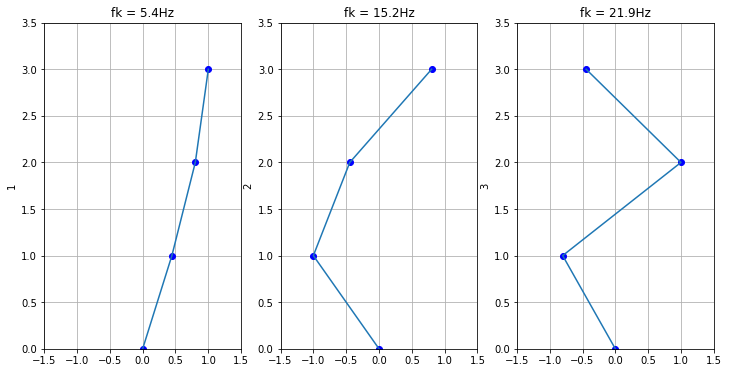

In [9]:
plt.figure(3, figsize=(12,6))
x = np.arange(4)

for k in range(3):
    pk = np.zeros(4)
    pk[1:] = Phi3[::-1,k]
    pk /= np.max(np.abs(pk))   # adjust scale for unity amplitude
    
    plt.subplot(1,3,k+1)
    plt.plot(pk, x, 'bo')
    plt.plot(pk, x)
    
    plt.xlim(-1.5, 1.5);  plt.ylabel(str(k+1));
    plt.ylim( 0.0, 3.5);
    plt.title('fk = {0:3.1f}Hz'.format(fk3[k]));
    plt.grid(True)


<table align="left">
 <tr>
   <td align="left"><img src="images/model3dof_mode1.jpg" alt="3dof mode 1" width="240px"/></td>
   <td align="left"><img src="images/model3dof_mode2.jpg" alt="3dof mode 2" width="240px"/></td>
   <td align="left"><img src="images/model3dof_mode3.jpg" alt="3dof mode 3" width="240px"/></td>
 </tr>
 <tr>
   <td align="left">$f_1 =  5.4$Hz</td>
   <td align="left">$f_2 = 15.2$Hz</td>
   <td align="left">$f_3 = 22.9$Hz</td>
 </tr>
</table> 


## 3. Structural response to initial conditions <a name="section_3"></a> 



## 4. The Rayleigh viscous damping matrix <a name="section_4"></a> 



## 5. Assignments <a name="section_5"></a> 

The eigenproblem solutions generated in this class are know saved to disk,
and will be available to the following classes:


In [12]:
with open('data/sample_EGV.pk', 'wb') as EGV:
    pk.dump((wk1, Phi1, wk2, Phi2, wk3, Phi3), EGV)


TypeError: dump() takes exactly 1 argument (2 given)